In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis1/sst2_valid.parquet
/kaggle/input/sentiment-analysis1/sst2_train.parquet


In [4]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = '/kaggle/input/sentiment-analysis1/sst2_train.parquet'
df = pd.read_parquet(file_path)

# Split the dataset into training, testing, and validation
train_data = df.iloc[:62349]
test_data = df.iloc[62349:]

# Load the validation dataset
val_data = pd.read_parquet('/kaggle/input/sentiment-analysis1/sst2_valid.parquet')

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['sentence'])
X_train = tokenizer.texts_to_sequences(train_data['sentence'])
X_test = tokenizer.texts_to_sequences(test_data['sentence'])
X_val = tokenizer.texts_to_sequences(val_data['sentence'])

# Padding sequences to ensure uniform input size
max_length = 100  # Define the max sequence length
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)
X_val = pad_sequences(X_val, maxlen=max_length)

# Encode labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['label'])
y_test = encoder.transform(test_data['label'])
y_val = encoder.transform(val_data['label'])

# Check shapes of the final data
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)


(62349, 100) (5000, 100) (872, 100) (62349,) (5000,) (872,)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Build the RNN model from scratch
model_rnn = Sequential()

# Embedding layer: maps words to dense vectors
model_rnn.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))

# SimpleRNN layer: This is a basic RNN that processes sequences
model_rnn.add(SimpleRNN(128, return_sequences=False))

# Dropout layer: Helps in regularizing the model
model_rnn.add(Dropout(0.5))

# Dense layer: Final classification layer with sigmoid activation for binary classification
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

# Evaluate on test set
test_loss_rnn, test_acc_rnn = model_rnn.evaluate(X_test, y_test)
print(f"RNN Test Accuracy: {test_acc_rnn}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7266 - loss: 0.5123 - val_accuracy: 0.6204 - val_loss: 0.7392
Epoch 2/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8710 - loss: 0.3150 - val_accuracy: 0.7982 - val_loss: 0.5316
Epoch 3/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9228 - loss: 0.2061 - val_accuracy: 0.7936 - val_loss: 0.5905
Epoch 4/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9449 - loss: 0.1520 - val_accuracy: 0.8073 - val_loss: 0.5752
Epoch 5/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9482 - loss: 0.1430 - val_accuracy: 0.8005 - val_loss: 0.6411
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9088 - loss: 0.2561
RNN Test Accuracy: 0.9133999943733215


In [6]:
from tensorflow.keras.layers import LSTM

# Build the LSTM model from scratch
model_lstm = Sequential()

# Embedding layer
model_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))

# LSTM layer: This is a Long Short-Term Memory layer for sequence learning
model_lstm.add(LSTM(128, return_sequences=False))

# Dropout layer
model_lstm.add(Dropout(0.5))

# Dense layer: Final classification layer
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

# Evaluate on test set
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {test_acc_lstm}")


Epoch 1/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7230 - loss: 0.5091 - val_accuracy: 0.8303 - val_loss: 0.4180
Epoch 2/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9236 - loss: 0.1977 - val_accuracy: 0.8177 - val_loss: 0.4552
Epoch 3/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9449 - loss: 0.1435 - val_accuracy: 0.8326 - val_loss: 0.5088
Epoch 4/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9556 - loss: 0.1101 - val_accuracy: 0.8268 - val_loss: 0.5540
Epoch 5/5
975/975 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9618 - loss: 0.0921 - val_accuracy: 0.8085 - val_loss: 0.5963
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9204 - loss: 0.2683
LSTM Test Accuracy: 0.9200000166893005


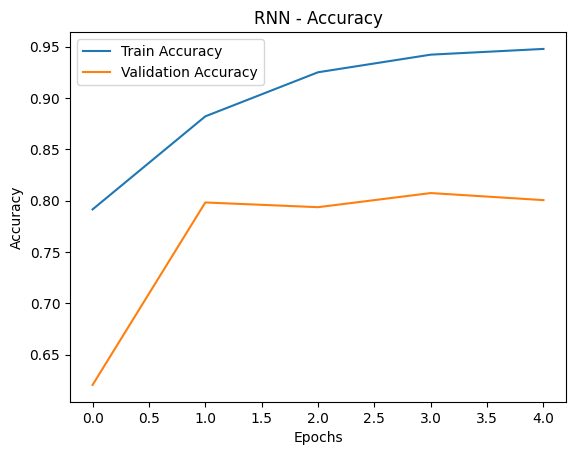

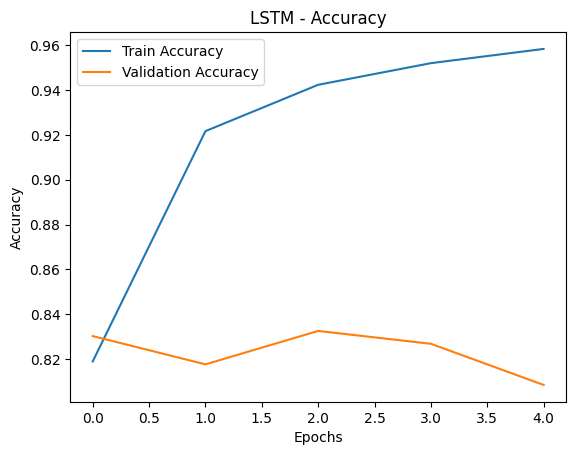

In [10]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for both models
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot for RNN
plot_history(history_rnn, "RNN")

# Plot for LSTM
plot_history(history_lstm, "LSTM")
